### Analysis of all the experimental data and plotting performance plots

In [37]:
# import all the modules here

import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np

In [38]:
# Load replicate metrics data (with Offset Error included!)
P_metrics = pd.read_csv('performance_metrics/P_replicate_metrics_10_tol_band.csv')
PI_metrics = pd.read_csv('performance_metrics/PI_replicate_metrics_10_tol_band.csv')
PID_metrics = pd.read_csv('performance_metrics/PID_replicate_metrics_10_tol_band.csv')

# Add Control column
P_metrics['Control'] = 'P'
PI_metrics['Control'] = 'PI'
PID_metrics['Control'] = 'PID'

# Combine data
all_metrics = pd.concat([P_metrics, PI_metrics, PID_metrics], ignore_index=True)

# Replace NaN/None t_settle with high value (e.g., 1000)
high_time = 960
all_metrics['t_settle'] = all_metrics['t_settle'].fillna(high_time)
all_metrics['Settling Time'] = all_metrics['Settling Time'].fillna(high_time)

# # === Drop rows with missing/NaN t_settle
# all_metrics = all_metrics.dropna(subset=['t_settle'])
# all_metrics = all_metrics.dropna(subset=['Settling Time'])

print("\n=== Combined Metrics Data ===")
print(all_metrics)


=== Combined Metrics Data ===
   Set Point  Replicate  Rise Time  Settling Time  t_settle  Offset Error  \
0        SP1          1        100          600.0     500.0     20.506713   
1        SP1          2        110          700.0     590.0     22.016251   
2        SP1          3        110          670.0     560.0     20.038141   
3        SP1          4        110          530.0     420.0     19.468529   
4        SP1          5        110          500.0     390.0     17.272393   
5        SP1          6        110          640.0     530.0     20.834113   
6        SP1          7        110         1000.0     890.0     25.891210   
7        SP1          8        110          910.0     800.0     24.043337   
8        SP1          9        110          920.0     810.0     24.435321   
9        SP2          1        260          960.0     700.0     20.923277   
10       SP2          2        200          530.0     330.0     15.653528   
11       SP2          3        190          5

P: X,Y = 718.8888888888889 , 21.61177870873273
P: X_std,Y_std = 181.20737046574874 , 2.7406214768919854
PI: X,Y = 330.0 , 8.947364899178433
PI: X_std,Y_std = 304.3681980759488 , 5.038795654710151
PID: X,Y = 310.0 , 9.418005099289223
PID: X_std,Y_std = 176.7484087622856 , 2.0795189219263803
P: X,Y = 636.6666666666666 , 16.692698261863537
P: X_std,Y_std = 164.39282222773596 , 2.93391351201129
PI: X,Y = 486.6666666666667 , 12.582735929171152
PI: X_std,Y_std = 141.51560573543352 , 2.7080338181821193
PID: X,Y = 313.3333333333333 , 3.9195963602175308
PID: X_std,Y_std = 13.662601021279464 , 2.985972806680981


<ipython-input-39-fb5218f4158d>:50: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ellipse = Ellipse((x_mean, y_mean), width=width, height=height,


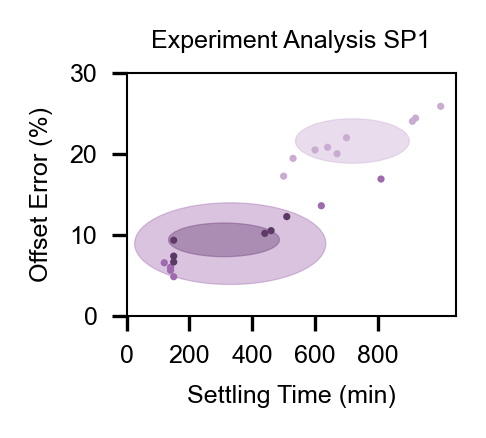

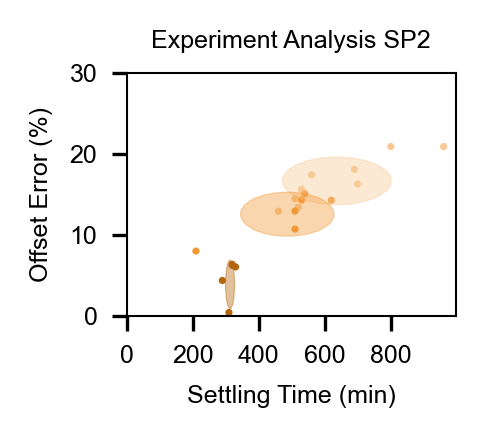

In [39]:
unique_set_points = all_metrics['Set Point'].unique()

plt.rcParams['font.family'] = 'Arial'

# Replace NaN/None t_settle with high value (e.g., 960)
all_metrics_clean = all_metrics.copy()
high_time = 960
all_metrics_clean['t_settle'] = all_metrics_clean['t_settle'].fillna(high_time)
all_metrics_clean['Settling Time'] = all_metrics_clean['Settling Time'].fillna(high_time)

# Plotting settings
ellipse_sigma_multiplier = 1
title_fontsize = 6
axis_label_fontsize = 6
tick_label_fontsize = 6
legend_fontsize = 6
box_text_fontsize = 6
marker_size = 3
alp = 0.4
control_colors_dots = {'SP1': {'P': '#caacd2', 'PI': '#A06AAF', 'PID': '#2c1a31'}, 'SP2' :  {'P': '#f8c994', 'PI': '#F29935', 'PID': '#b5650b'}}
control_colors_shades = {'SP1': {'P': '#caacd2', 'PI': '#A06AAF', 'PID': '#683e74'}, 'SP2' :  {'P': '#f8c994', 'PI': '#F29935', 'PID': '#b5650b'}}
#control_colors = {'SP1' : {'P': '#A06AAF', 'PI': '#A06AAF', 'PID': '#A06AAF'}, 'SP2' :  {'P': '#F29935', 'PI': '#F29935', 'PID': '#F29935'}}
# Patterns inside shaded region
control_hatches = {'P': '/////', 'PI': '|||---', 'PID': 'xxxx'}  # three distinct patterns
hatch_lw = 1  # thickness of hatch lines
plt.rcParams['hatch.linewidth'] = hatch_lw  # make hatches crisper in SVG/PDF

# Generate separate plots for each set point
for set_point in unique_set_points:
    fig, ax = plt.subplots(figsize=(1.72, 1.56), dpi=300)
    subset_metrics = all_metrics_clean[all_metrics_clean['Set Point'] == set_point]
    distance_texts = []
    legend_elements = []  # store handles for legend

    for control in ['P', 'PI', 'PID']:
        subset = subset_metrics[subset_metrics['Control'] == control]
        ax.scatter(subset['Settling Time'], subset['Offset Error'],
                   color = control_colors_dots[set_point][control], s = marker_size,
                   edgecolor = 'none', alpha = 1, label = f'{control} Control')
        
        x_mean = subset['Settling Time'].mean()
        y_mean = subset['Offset Error'].mean()
        x_std = subset['Settling Time'].std()
        y_std = subset['Offset Error'].std()
        print(f'{control}'+': X,Y = '+str(x_mean)+' , '+str(y_mean))
        print(f'{control}'+': X_std,Y_std = '+str(x_std)+' , '+str(y_std))
        
        width = 2 * x_std * ellipse_sigma_multiplier
        height = 2 * y_std * ellipse_sigma_multiplier
        ellipse = Ellipse((x_mean, y_mean), width=width, height=height,
                          color=control_colors_shades[set_point][control], alpha=alp,
                          edgecolor='k', linewidth=0.3)#,                              # hatch uses edgecolor
            #hatch=control_hatches[control])
        ax.add_patch(ellipse)

        # Legend entry = hatched patch only
        legend_elements.append(
            Patch(facecolor=control_colors_shades[set_point][control],
                  edgecolor='k',
                  hatch=control_hatches[control],
                  alpha=alp,
                  label=f'{control} Control')
        )

        distance = np.sqrt(x_mean**2 + y_mean**2)
        distance_texts.append(f"{control}: {distance:.1f}")

    distance_summary = "\n".join(distance_texts)
    # ax.text(0.95, 0.2, distance_summary,
    #         transform=ax.transAxes, fontsize=box_text_fontsize, color='k',
    #         ha='right', va='top',
    #         bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.6))

    ax.set_xlabel('Settling Time (min)', fontsize=axis_label_fontsize)
    ax.set_ylabel('Offset Error (%)', fontsize=axis_label_fontsize)
    ax.set_title(f'Experiment Analysis {set_point}', fontsize=title_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)
    # ax.legend(fontsize=legend_fontsize, ncol = 3)
    # ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0, top = 30)
    ax.set_xticks([0, 200, 400, 600, 800])  # Set custom x-axis ticks

    # # Legend — showing both dots & hatches
    # ax.legend(handles=legend_elements, fontsize=legend_fontsize, ncol=3,
    #           loc='upper right', frameon=True, handlelength=2.0,   # width of the box
    # handleheight=2.0,   # height of the box
    # borderpad=0.5)

    # Increase the thickness of the figure box (spines)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # You can adjust this value as needed

    plt.tight_layout()
    # Create a filename that reflects the current set point
    filename = f"performance_analysis_plots/exp_performance_analysis_{str(set_point).replace(' ', '_')}_10_tol_band.svg"
    plt.savefig(filename, transparent=False, dpi=300)

In [40]:
# # === Save the combined metrics data to a CSV file ===
# all_metrics.to_csv('all_control_metrics.csv', index=False)
# print("Combined metrics data saved to 'all_control_metrics.csv'.")

In [41]:
# === Collect X,Y mean and std from plotting loop and export ===
export_rows = []

unique_set_points = all_metrics_clean['Set Point'].unique()

for set_point in unique_set_points:
    subset_metrics = all_metrics_clean[all_metrics_clean['Set Point'] == set_point]
    for control in ['P', 'PI', 'PID']:
        subset = subset_metrics[subset_metrics['Control'] == control]
        x_mean = subset['Settling Time'].mean()
        y_mean = subset['Offset Error'].mean()
        x_std = subset['Settling Time'].std()
        y_std = subset['Offset Error'].std()
        
        # Keep same prints if you like
        print(f'{set_point} | {control}: X,Y = {x_mean} , {y_mean}')
        print(f'{set_point} | {control}: X_std,Y_std = {x_std} , {y_std}')
        
        # Append to export
        export_rows.append({
            'Set Point': set_point,
            'Control': control,
            'X_mean': x_mean,
            'Y_mean': y_mean,
            'X_std': x_std,
            'Y_std': y_std,
            'X_extent': (np.round(x_mean-x_std,2), np.round(x_mean+x_std, 2)),
            'Y_extent': (np.round(y_mean-y_std,2), np.round(y_mean+y_std, 2)),
            'n': len(subset)
        })

# Convert to DataFrame
export_df = pd.DataFrame(export_rows)

# Round for readability
export_df = export_df.round(3)

# Save to CSV
out_path = 'performance_metrics/performance_analysis_means_stds_exp.csv'
os.makedirs(os.path.dirname(out_path), exist_ok=True)
export_df.to_csv(out_path, index=False)

print("\n=== Exported Stats ===")
print(export_df)
print(f"\nSaved to: {out_path}")

SP1 | P: X,Y = 718.8888888888889 , 21.61177870873273
SP1 | P: X_std,Y_std = 181.20737046574874 , 2.7406214768919854
SP1 | PI: X,Y = 330.0 , 8.947364899178433
SP1 | PI: X_std,Y_std = 304.3681980759488 , 5.038795654710151
SP1 | PID: X,Y = 310.0 , 9.418005099289223
SP1 | PID: X_std,Y_std = 176.7484087622856 , 2.0795189219263803
SP2 | P: X,Y = 636.6666666666666 , 16.692698261863537
SP2 | P: X_std,Y_std = 164.39282222773596 , 2.93391351201129
SP2 | PI: X,Y = 486.6666666666667 , 12.582735929171152
SP2 | PI: X_std,Y_std = 141.51560573543352 , 2.7080338181821193
SP2 | PID: X,Y = 313.3333333333333 , 3.9195963602175308
SP2 | PID: X_std,Y_std = 13.662601021279464 , 2.985972806680981

=== Exported Stats ===
  Set Point Control   X_mean  Y_mean    X_std  Y_std          X_extent  \
0       SP1       P  718.889  21.612  181.207  2.741   (537.68, 900.1)   
1       SP1      PI  330.000   8.947  304.368  5.039   (25.63, 634.37)   
2       SP1     PID  310.000   9.418  176.748  2.080  (133.25, 486.75)   